In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.17.3
pandas 0.25.2
sklearn 0.21.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [7]:
# 超参数搜索 lr
# W = W + grad * learning_rate
learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation='relu',
                           input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 100,
                    callbacks = callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 131us/sample - loss: 5.8966 - val_loss: 5.1176
Epoch 2/100
11610/11610 [==============================] - 1s 44us/sample - loss: 4.0808 - val_loss: 3.6617
Epoch 3/100
11610/11610 [==============================] - 0s 36us/sample - loss: 2.9815 - val_loss: 2.7544
Epoch 4/100
11610/11610 [==============================] - 0s 38us/sample - loss: 2.2798 - val_loss: 2.1588
Epoch 5/100
11610/11610 [==============================] - 0s 38us/sample - loss: 1.8134 - val_loss: 1.7552
Epoch 6/100
11610/11610 [==============================] - 0s 38us/sample - loss: 1.4939 - val_loss: 1.4726
Epoch 7/100
11610/11610 [==============================] - 0s 39us/sample - loss: 1.2692 - val_loss: 1.2704
Epoch 8/100
11610/11610 [==============================] - 0s 37us/sample - loss: 1.1077 - val_loss: 1.1230
Epoch 9/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.98

11610/11610 [==============================] - 0s 39us/sample - loss: 0.6145 - val_loss: 0.6614
Epoch 21/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.6085 - val_loss: 0.6550
Epoch 22/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.6028 - val_loss: 0.6492
Epoch 23/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5973 - val_loss: 0.6434
Epoch 24/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.5921 - val_loss: 0.6377
Epoch 25/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5870 - val_loss: 0.6321
Epoch 26/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5822 - val_loss: 0.6269
Epoch 27/100
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5775 - val_loss: 0.6219
Epoch 28/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.5729 - val_loss: 0.6169
Epoch 29/100
11610/11610 [======

Epoch 35/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4433 - val_loss: 0.4735
Epoch 36/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4412 - val_loss: 0.4705
Epoch 37/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4401 - val_loss: 0.4685
Epoch 38/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4380 - val_loss: 0.4670
Epoch 39/100
11610/11610 [==============================] - 0s 39us/sample - loss: 0.4359 - val_loss: 0.4650
Epoch 40/100
11610/11610 [==============================] - 0s 38us/sample - loss: 0.4342 - val_loss: 0.4635
Epoch 41/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4326 - val_loss: 0.4611
Epoch 42/100
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4308 - val_loss: 0.4596
Epoch 43/100
11610/11610 [==============================] - 0s 37us/sample - loss: 0.4291 - val_loss: 0.4570
Epoch 44/100
11610/

D:\soft_mine\Anaconda3\envs\mlcc\lib\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):


11610/11610 [==============================] - 1s 44us/sample - loss: nan - val_loss: nan
Epoch 3/100
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan
Epoch 4/100
11610/11610 [==============================] - 0s 39us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 0s 42us/sample - loss: nan - val_loss: nan


lr: 0.0001


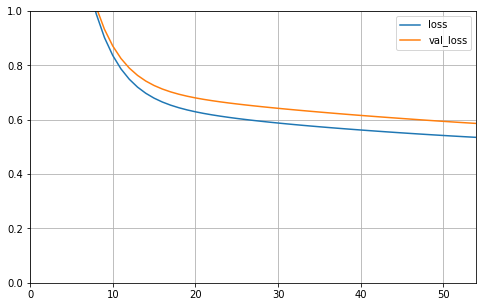

lr: 0.0003


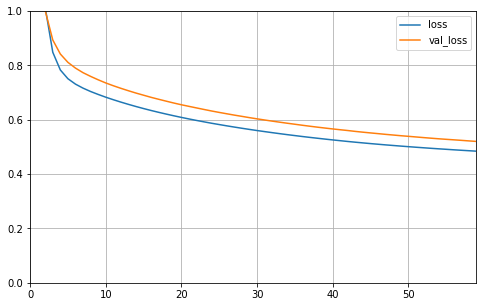

lr: 0.001


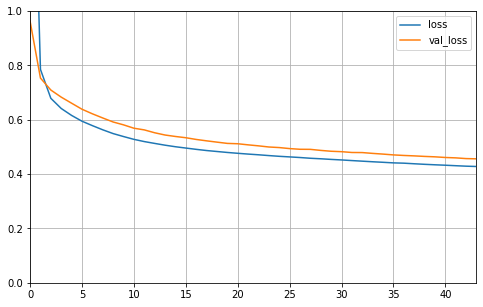

lr: 0.003


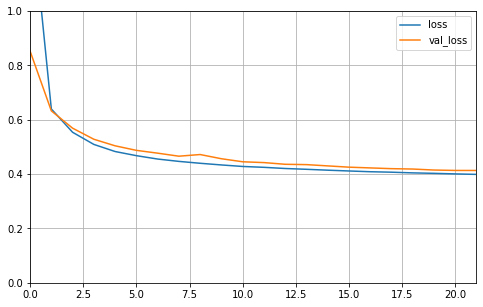

lr: 0.01


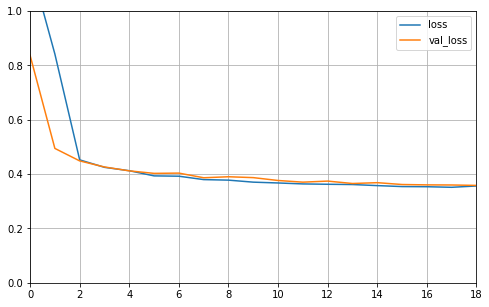

lr: 0.03


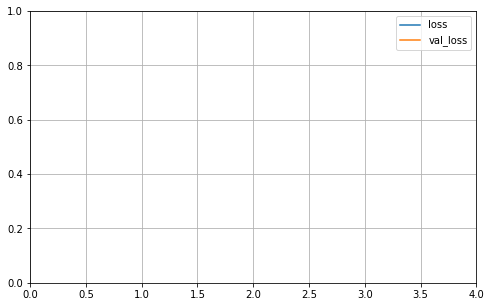

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
for lr, history in zip(learning_rates, histories):
    print('lr:',lr)
    plot_learning_curves(history)